# Preprocessing Script

In [15]:
import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, butter, filtfilt, freqz
try:
    from scipy.signal import hann
except:
    from scipy.signal.windows import hann
from scipy.integrate import simps
from scipy import stats

import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 
from mne.stats import permutation_cluster_test
from mne.preprocessing import ICA, create_ecg_epochs


In [16]:
from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)

import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as PyPerceive_find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers


# utils
import beta.utils.find_folders as find_folders
import beta.utils.io as io

# tfr
import beta.preprocessing.tfr as tfr

# plots
import beta.plotting.power_spectra_plots as power_spectra


importlib.reload(find_folders)
importlib.reload(io)
importlib.reload(tfr)
importlib.reload(power_spectra)


<module 'beta.plotting.power_spectra_plots' from 'c:\\Users\\richa\\GitHub\\Beta_profile\\.venv\\Lib\\site-packages\\beta\\plotting\\power_spectra_plots.py'>

### Load MNE Objects from PyPerceive

In [17]:
loaded_data = io.load_py_perceive_object(
    sub="019",
    session="fu3m",
    condition="m0s0",
    hemisphere="Right"
)
loaded_data


	### WARNING: NaNs in Metadata Table sub-019 ###
NaNs in: sub019_ses-2021042207162599_run-BrainSense20210422074600.mat
NaNs in: sub019_ses-2021042207162599_run-BrainSense20210422075600.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081000.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081300.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081500.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081900.mat
NaNs in: sub019_ses-2021070506275097_run-BrainSense20210705070700.mat
NaNs in: sub019_ses-2021070506275097_run-BrainSense20210705072100.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705074000.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705074300.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705075000.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705075800.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705081000.mat
NaNs in: sub019_ses-2021070508345297_run-BrainSense20210705084300.mat
Na

PerceiveData(sub='019', incl_modalities=['survey'], incl_session=['fu3m'], incl_condition=['m0s0'], incl_task=['rest'], incl_contact=['RingR', 'SegmIntraR', 'SegmInterR'], import_json=False, warn_for_metaNaNs=True, use_chronic_json_file=True, allow_NaNs_in_metadata=False)

In [18]:
data = io.extract_data_from_py_perceive(
    sub="024",
    session="fu12m",
    condition="m0s0",
    hemisphere="Right"
)
data


	### WARNING: NaNs in Metadata Table sub-024 ###
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618063700.mat
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618064000.mat
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618064200.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084000.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084300.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084700.mat
NaNs in: sub024_ses-2021092106385396_run-BrainSense20210921070500.mat
NaNs in: sub024_ses-2021092106385396_run-BrainSense20210921072300.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921074800.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921080600.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921082400.mat
NaNs in: sub-20210615PStn_ses-2022061010445782_run-BrainSense20220610105800.mat
NaNs in: sub-20210615PStn_ses-2022061010445782_run-BrainSense20220610111500.mat
NaNs in: sub-2021061

{'RingR': <RawArray | 6 x 5288 (21.1 s), ~257 kB, data loaded>,
 'SegmIntraR': <RawArray | 6 x 5288 (21.1 s), ~257 kB, data loaded>,
 'SegmInterR': <RawArray | 3 x 5188 (20.7 s), ~129 kB, data loaded>}

In [19]:
ring_data = data["SegmIntraR"]

Pick a channel of interest, perform a Fourier Transform and then plot the PSD

In [20]:
structured_signals = tfr.pick_channels_of_interest(
    sub="024",
    session="fu12m",
    condition="m0s0",
    hemisphere="Right"
)


	### WARNING: NaNs in Metadata Table sub-024 ###
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618063700.mat
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618064000.mat
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618064200.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084000.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084300.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084700.mat
NaNs in: sub024_ses-2021092106385396_run-BrainSense20210921070500.mat
NaNs in: sub024_ses-2021092106385396_run-BrainSense20210921072300.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921074800.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921080600.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921082400.mat
NaNs in: sub-20210615PStn_ses-2022061010445782_run-BrainSense20220610105800.mat
NaNs in: sub-20210615PStn_ses-2022061010445782_run-BrainSense20220610111500.mat
NaNs in: sub-2021061

In [21]:
structured_signals

,original_channel,channel,lfp,lfp_group
0,LFP_R_12_STN_MT,12,"[1.3601056882, 2.153500673, 1.7001321103, 2.72...",RingR
1,LFP_R_01_STN_MT,01,"[-4.554200042, -4.668055043, -7.5144300693, -7...",RingR
2,LFP_R_23_STN_MT,23,"[-1.3479618874, -4.6055364487, -6.4028189653, ...",RingR
3,LFP_R_1A1B_STN_MT,1A1B,"[3.4822348759, 4.2685459769, 7.076799909, 7.63...",SegmIntraR
4,LFP_R_1B1C_STN_MT,1B1C,"[-3.6433600336, -2.0493900189, -4.0987800378, ...",SegmIntraR
5,LFP_R_1A1C_STN_MT,1A1C,"[1.2356317301, 2.358933303, 3.5945650331, 3.14...",SegmIntraR
6,LFP_R_2A2B_STN_MT,2A2B,"[0.5667107034, 0.6800528441, -1.2467635475, -2...",SegmIntraR
7,LFP_R_2B2C_STN_MT,2B2C,"[-3.3017950304, -2.6186650241, -2.5048100231, ...",SegmIntraR
8,LFP_R_2A2C_STN_MT,2A2C,"[-4.4932062914, -3.8192253477, -3.145244404, -...",SegmIntraR
9,LFP_R_1A2A_STN_MT,1A2A,"[-25.8359361757, -27.2962282204, -20.444088626...",SegmInterR


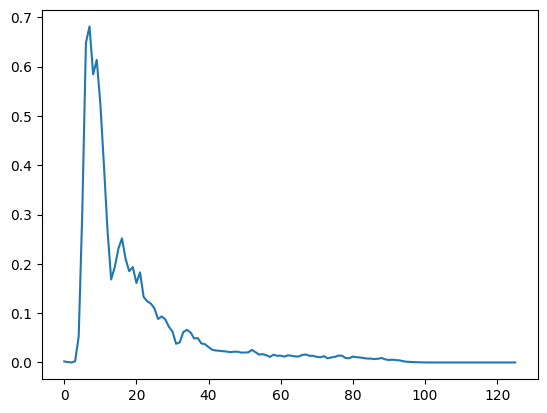

In [22]:
lfp = structured_signals.lfp.values[0]

filtered_lfp = tfr.band_pass_filter(lfp)
fourier_transformed_lfp = tfr.fourier_transform(filtered_lfp)

f = fourier_transformed_lfp["freq"]
psd = fourier_transformed_lfp["average_Sxx"]

plt.plot(f, psd)

In [23]:
peaks = scipy.signal.find_peaks(psd, height=0.03)
peaks

(array([ 7,  9, 16, 19, 21, 27, 34, 37], dtype=int64),
 {'peak_heights': array([0.68151314, 0.61371891, 0.2517362 , 0.19353705, 0.18275293,
         0.09339423, 0.06620088, 0.0494112 ])})

In [24]:
peaks_height = peaks[1]["peak_heights"] # np.array of y-value of peaks = power
peaks_pos = f[peaks[0]] # np.array of indeces on x-axis of peaks = frequency

peak_pos = peaks_pos[(peaks_pos >= 13) & (peaks_pos <= 35)]
peak_height = peaks_height[(peaks_pos >= 13) & (peaks_pos <= 35)] 

In [25]:
peak_pos

array([16., 19., 21., 27., 34.])

In [26]:
peak_height

array([0.2517362 , 0.19353705, 0.18275293, 0.09339423, 0.06620088])

In [27]:
highest_peak_height = peak_height.max()
# get the index of the highest peak y value to get the corresponding peak position x
ix = np.where(peak_height == highest_peak_height)
highest_peak_pos = peak_pos[ix].item()

highest_peak_pos = int(highest_peak_pos) # CF als integer

# 2) go -2 and +3 indeces 
index_low_cut = highest_peak_pos-2
index_high_cut = highest_peak_pos+3

index_low_cut, index_high_cut

cf_4Hz_range = np.arange(index_low_cut, index_high_cut, 1)
cf_4Hz_range

array([14, 15, 16, 17, 18])

In [28]:
# calculate area under the curve of power
beta_power_in_freq_range = psd[
    index_low_cut : index_high_cut
]  # select the power values by indexing from frequency range first until last value

beta_power_area_under_curve = simps(beta_power_in_freq_range, cf_4Hz_range)
beta_power_area_under_curve

C:\Users\richa\AppData\Local\Temp\ipykernel_18544\661750252.py:6: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  beta_power_area_under_curve = simps(beta_power_in_freq_range, cf_4Hz_range)


0.8820567733607594

In [29]:
beta_power_in_freq_range


array([0.19360024, 0.23087969, 0.2517362 , 0.2101268 , 0.1850717 ])

### Filter and FT of LFP

In [30]:
beta_profile = tfr.main_tfr(
    sub="024",
    session="fu12m",
    condition="m0s0",
    hemisphere="Right"
)


	### WARNING: NaNs in Metadata Table sub-024 ###
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618063700.mat
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618064000.mat
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618064200.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084000.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084300.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084700.mat
NaNs in: sub024_ses-2021092106385396_run-BrainSense20210921070500.mat
NaNs in: sub024_ses-2021092106385396_run-BrainSense20210921072300.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921074800.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921080600.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921082400.mat
NaNs in: sub-20210615PStn_ses-2022061010445782_run-BrainSense20220610105800.mat
NaNs in: sub-20210615PStn_ses-2022061010445782_run-BrainSense20220610111500.mat
NaNs in: sub-2021061

In [31]:
# freq range info: peak CF, peak power, average in f band
beta_profile[0]

,channel,f_range,power_in_f_range,peak_CF,peak_power,peak_4Hz_power
0,01,low_beta,0.439947,16,0.510512,1.823721
1,01,high_beta,0.187556,23,0.326573,1.101409
2,01,beta,0.275344,16,0.510512,1.823721
3,12,low_beta,0.199326,16,0.251736,0.882057
4,12,high_beta,0.089374,21,0.182753,0.620158
5,12,beta,0.127618,16,0.251736,0.882057
6,23,low_beta,0.198267,18,0.226481,0.811127
7,23,high_beta,0.089804,21,0.188326,0.670212
8,23,beta,0.127530,18,0.226481,0.811127
9,1A1B,low_beta,0.104303,18,0.127099,0.413261


In [32]:
# LFP and PSD of channels
beta_profile[1]

,channel,unfiltered_lfp,filtered_lfp,frequencies,filtered_psd
0,01,"[-4.554200042, -4.668055043, -7.5144300693, -7...","[-0.3055541438901088, -1.0885203035881121, -4....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.005068439932701869, 0.002264752433038918, 0..."
1,12,"[1.3601056882, 2.153500673, 1.7001321103, 2.72...","[-0.03508955524072013, 0.7694804077828004, 0.8...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.0020488780742327533, 0.0009028849211311065,..."
2,23,"[-1.3479618874, -4.6055364487, -6.4028189653, ...","[-0.008249006573099009, -3.334320975452589, -4...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.002525105266549875, 0.001103859098392999, 4..."
3,1A1B,"[3.4822348759, 4.2685459769, 7.076799909, 7.63...","[-0.04288755968347713, 0.9119064086763287, 3.3...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.0009946784483460442, 0.00045162787295081473..."
4,1A1C,"[1.2356317301, 2.358933303, 3.5945650331, 3.14...","[0.18823502164939387, 1.0271690260587705, 2.81...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.0008318762733446031, 0.0003750310269756578,..."
5,1B1C,"[-3.6433600336, -2.0493900189, -4.0987800378, ...","[0.20269470178489774, 1.5454245188811648, -0.4...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.0006305004370307836, 0.00028218996392794405..."
6,2A2B,"[0.5667107034, 0.6800528441, -1.2467635475, -2...","[0.1318925246519917, 0.06745790330548607, -2.3...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.0064611192331723135, 0.0028043416071777093,..."
7,2A2C,"[-4.4932062914, -3.8192253477, -3.145244404, -...","[0.1419135985775375, 0.7396694967543971, 1.010...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.006070348761747429, 0.002674208290163187, 5..."
8,2B2C,"[-3.3017950304, -2.6186650241, -2.5048100231, ...","[-0.006099770378319241, 0.9310020358438503, 1....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.006290511408720192, 0.002729956052617103, 8..."
9,1A2A,"[-25.8359361757, -27.2962282204, -20.444088626...","[-0.2551289350001271, -1.7713027380424773, 3.5...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.005335302729116408, 0.002376526141491408, 4..."
